Plotting transformed images for class: Powdery mildew
Plotting transformed images for class: Healthy
Plotting transformed images for class: Cotton Boll Rot
Plotting transformed images for class: Bacterial blight
Plotting transformed images for class: Aphids


C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25 - Loss: 0.8224 Acc: 0.6849
Epoch 2/25 - Loss: 0.5406 Acc: 0.8058
Epoch 3/25 - Loss: 0.4596 Acc: 0.8300
Epoch 4/25 - Loss: 0.4167 Acc: 0.8500
Epoch 5/25 - Loss: 0.4022 Acc: 0.8546
Epoch 6/25 - Loss: 0.3949 Acc: 0.8587
Epoch 7/25 - Loss: 0.3791 Acc: 0.8618
Epoch 8/25 - Loss: 0.3655 Acc: 0.8627
Epoch 9/25 - Loss: 0.3532 Acc: 0.8736
Epoch 10/25 - Loss: 0.3715 Acc: 0.8596
Epoch 11/25 - Loss: 0.3465 Acc: 0.8724
Epoch 12/25 - Loss: 0.3598 Acc: 0.8673
Epoch 13/25 - Loss: 0.3466 Acc: 0.8738
Epoch 14/25 - Loss: 0.3468 Acc: 0.8709
Epoch 15/25 - Loss: 0.3412 Acc: 0.8784
Epoch 16/25 - Loss: 0.3241 Acc: 0.8810
Epoch 17/25 - Loss: 0.3243 Acc: 0.8805
Epoch 18/25 - Loss: 0.3429 Acc: 0.8738
Epoch 19/25 - Loss: 0.3198 Acc: 0.8808
Epoch 20/25 - Loss: 0.3392 Acc: 0.8724
Epoch 21/25 - Loss: 0.3361 Acc: 0.8800
Epoch 22/25 - Loss: 0.3189 Acc: 0.8815
Epoch 23/25 - Loss: 0.3133 Acc: 0.8834
Epoch 24/25 - Loss: 0.3313 Acc: 0.8822
Epoch 25/25 - Loss: 0.3099 Acc: 0.8841


C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


The image is classified as class: Bacterial blight
Execution time: 6638.170886039734 seconds


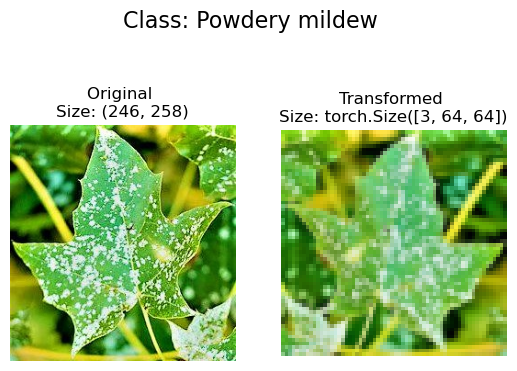

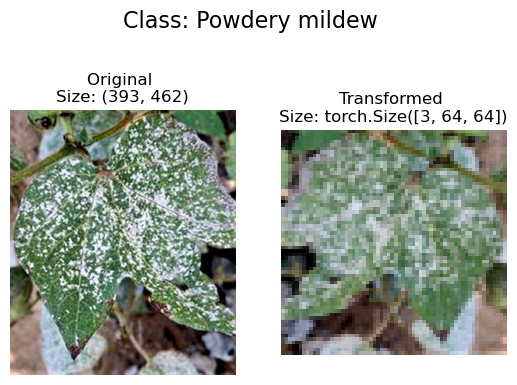

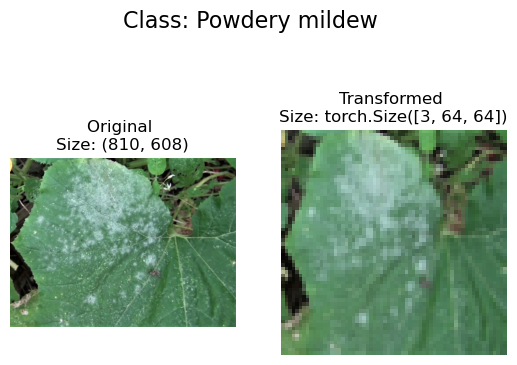

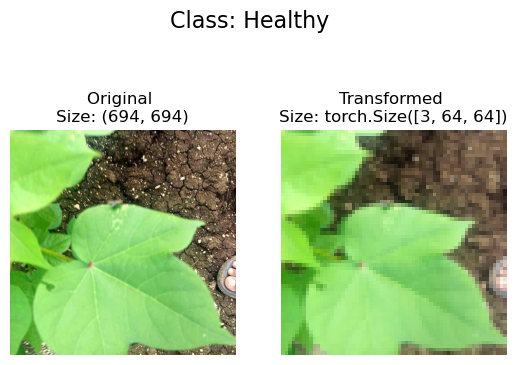

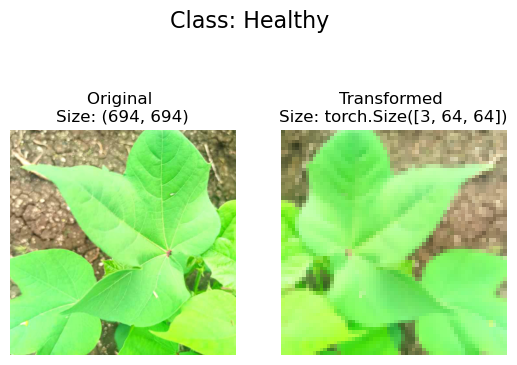

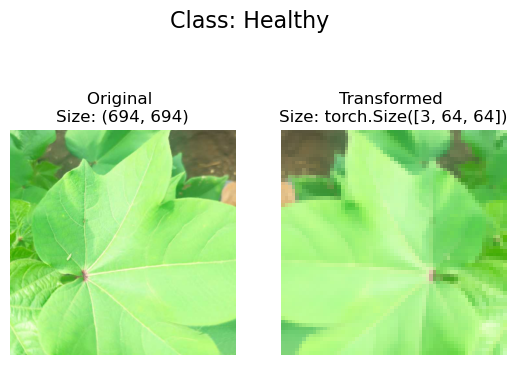

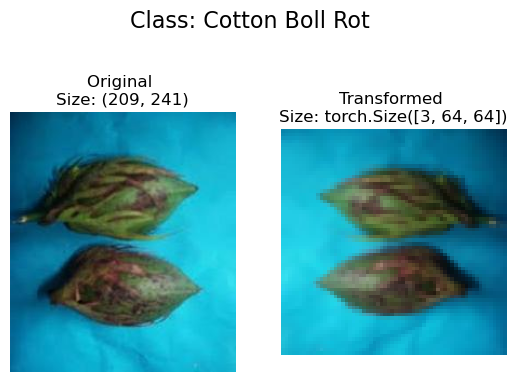

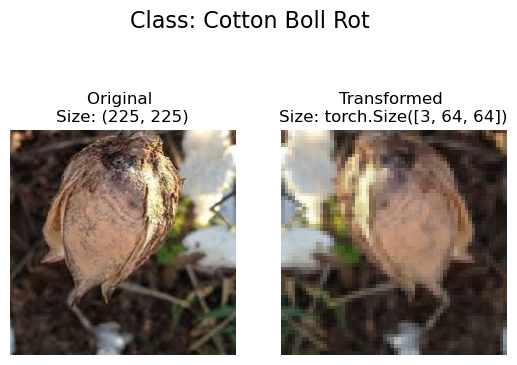

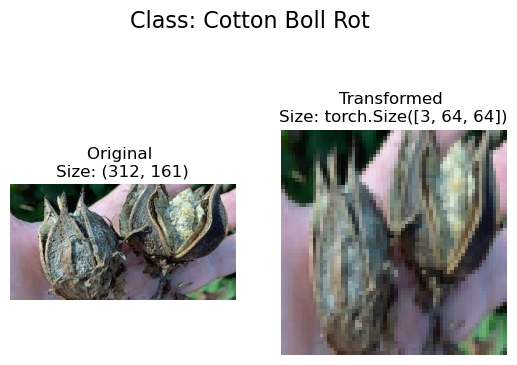

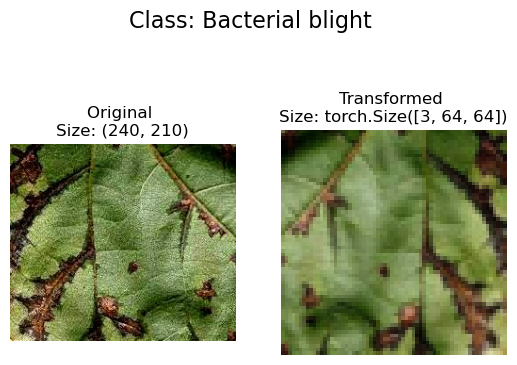

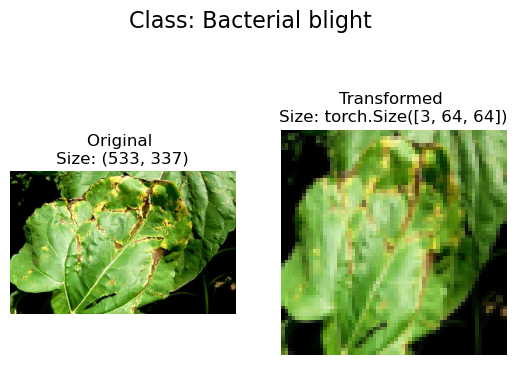

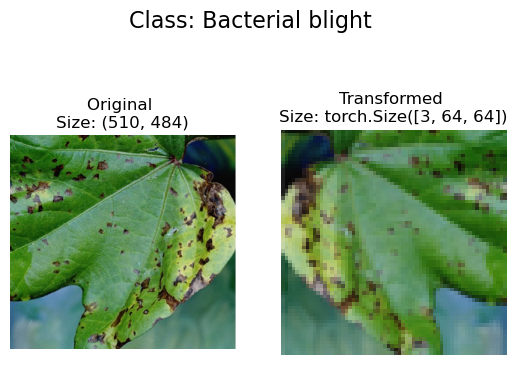

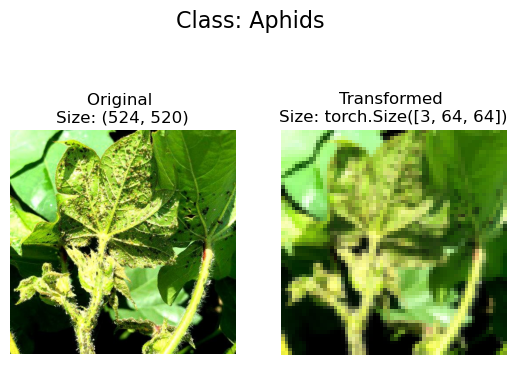

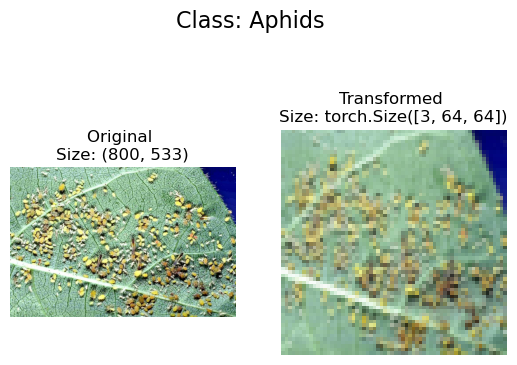

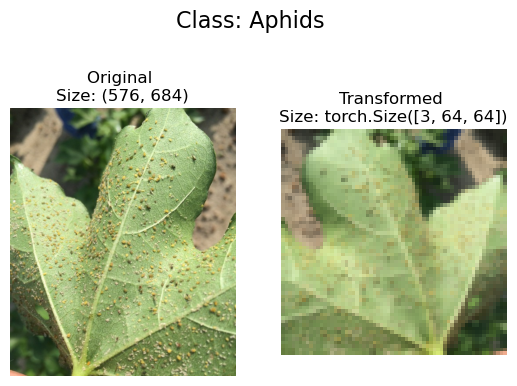

In [1]:
import time

# Record the start time
start_time = time.time()
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            transformed_image = transform(img)
            ax[1].imshow(transformed_image.permute(1, 2, 0))
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            class_name = os.path.basename(os.path.dirname(image_path))
            fig.suptitle(f"Class: {class_name}", fontsize=16)

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

main_folder = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton leaves - Training\\800 Images"

classes = ["Powdery mildew", "Healthy", "Cotton Boll Rot", "Bacterial blight", "Aphids"]
class_to_idx = {cls: i for i, cls in enumerate(classes)}

class_images = {cls: [] for cls in classes}

for cls in classes:
    class_folder = os.path.join(main_folder, cls)
    for filename in os.listdir(class_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, filename)
            class_images[cls].append(img_path)

image_path_list = {cls: images for cls, images in class_images.items()}

for cls in classes:
    print(f"Plotting transformed images for class: {cls}")
    plot_transformed_images(image_path_list[cls], transform=data_transform, n=3)

train_data = datasets.ImageFolder(root=main_folder, transform=data_transform)
class_names = train_data.classes

train_dataloader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6].requires_grad = True
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.001)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_data)
    epoch_acc = corrects.double() / len(train_data)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# Save the fine-tuned model (with the weights that we want)
torch.save(model.state_dict(), "first_tuned_model_cotton_disease.pth")

# Testing phase
test_image_path = "C:\\Users\\RoopaGanesh\\Downloads\\cotton_segment.jpg"
test_image = Image.open(test_image_path)

data_transform_test = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

transformed_test_image = data_transform_test(test_image)
transformed_test_image = transformed_test_image.unsqueeze(0)

model_test = models.vgg16(pretrained=False)
model_test.classifier[6] = nn.Linear(model_test.classifier[6].in_features, len(class_names))
model_test.load_state_dict(torch.load("first_tuned_model_cotton_disease.pth"))
model_test.eval()
transformed_test_image = transformed_test_image.to(device)
model_test = model_test.to(device)

with torch.no_grad():
    outputs_test = model_test(transformed_test_image)
    _, predicted_test = torch.max(outputs_test, 1)

predicted_class_test = class_names[predicted_test.item()]
print(f"The image is classified as class: {predicted_class_test}")


# Your code block here
# ...

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Execution time: {elapsed_time} seconds")



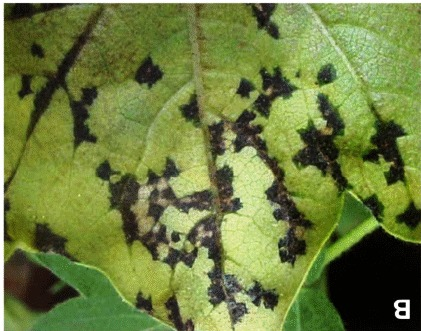

In [2]:
test_image_path = "C:\\Users\\RoopaGanesh\\Downloads\\cotton_segment.jpg"
test_image = Image.open(test_image_path)
test_image